This Python script will import vehicle data containing vehicle information and traffic violations. This data is processed and analyzed. Then the data is used to create five graphs showing insights that can be gained from the data. All the data findings and graphs are exported.

In [1]:
import pandas as pd
import numpy as np
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns

Import the vehicles data CSV.

In [2]:
filepath = 'vehicles_data.csv'

In [3]:
df = pd.read_csv(filepath, encoding="ISO-8859-1", low_memory=False)

Ensure proper typing.

In [4]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

Sample the data:

In [5]:
df.head()

,Date Of Stop,Time Of Stop,Description,Location,VehicleType,Year,Make,Model,Color,Violation Type,Race,Gender,Price
0,9/30/14,23:51:00,DRIVER FAILURE TO STOP AT STEADY CIRCULAR RED ...,PARK RD AT HUNGERFORD DR,02 - Automobile,2014.0,FORD,MUSTANG,BLACK,Citation,BLACK,M,7949.0
1,3/31/15,23:59:00,HEADLIGHTS (*),CONNECTICUT AT METROPOLITAN AVE,02 - Automobile,2003.0,HONDA,2S,BLUE,ESERO,HISPANIC,M,3022.0
2,9/30/14,23:30:00,FAILURE TO DISPLAY TWO LIGHTED FRONT LAMPS WHE...,OBSERVATION @ RIDGE ROAD,02 - Automobile,2009.0,TOYOTA,CAMRY,RED,Warning,BLACK,F,4939.0
3,3/31/15,23:59:00,DRIVER FAILURE TO STOP AT STOP SIGN LINE,W/B PLYERS MILL RD AT METROPOLITAN AVE,02 - Automobile,2007.0,ACURA,MDX,BLACK,Warning,WHITE,F,4105.0
4,3/31/15,23:58:00,STOP LIGHTS (*),2355 NB AT BATTERY LN,02 - Automobile,2003.0,NISSAN,MURANO,SILVER,ESERO,OTHER,M,3000.0


In [6]:
df.tail()

,Date Of Stop,Time Of Stop,Description,Location,VehicleType,Year,Make,Model,Color,Violation Type,Race,Gender,Price
803884,9/29/14,14:11:00,TIRES,GREAT SENECA HWY @ GREAT SENECA CREEK,02 - Automobile,1996.0,LEXUS,ES 300 4S,WHITE,ESERO,BLACK,M,500.0
803885,9/29/14,21:23:00,HEADLIGHTS (*),"7505 DEMOCRACY BLV ,MCG",02 - Automobile,2011.0,KIA,VN,RED,ESERO,BLACK,M,7217.0
803886,9/29/14,21:37:00,HEADLIGHTS (*),7300 TUCKERMAN LA AT 10998 WESTLAKE DR,02 - Automobile,2012.0,FIAT,2S,RED,ESERO,WHITE,F,7128.0
803887,9/28/14,23:33:00,HEADLIGHTS (*),DARNESTOWN RD @ QUINCE ORCHARD RD,02 - Automobile,1992.0,JEEP,TK,SILVER,ESERO,WHITE,M,500.0
803888,9/28/14,23:43:00,HEADLIGHTS (*),DARNESTOWN RD @ QUINCE ORCHARD RD,02 - Automobile,2010.0,HYUN,4S,GRAY,ESERO,WHITE,F,5339.0


Find and display the count of missing values for each field.

In [7]:
missing_vals = df.isnull().sum()

In [8]:
print(missing_vals)

Date Of Stop          0
Time Of Stop          0
Description           5
Location            831
VehicleType         829
Year               6844
Make                872
Model               956
Color             10939
Violation Type      829
Race                829
Gender             1658
Price              1658
dtype: int64


Determine the sixth newest vehicle year and price.

In [9]:
valid_years = df['Year'].dropna().unique()

In [10]:
sorted_years_oldest = sorted(valid_years, reverse=False)
sorted_years_newest = sorted(valid_years, reverse=True)

In [11]:
sixth_newest = sorted_years_newest[5]
sixth_price = df[df['Year'] == sixth_newest]['Price'].max()

In [12]:
print(sixth_newest)
print(sixth_price)

9035.0
2816339.0


Determine the fourth oldest vehicle year and price.

In [13]:
fourth_oldest = sorted_years_oldest[3]
fourth_maxprice = df[df['Year'] == fourth_oldest]['Price'].max()

In [14]:
print(fourth_oldest)
print(fourth_maxprice)

6.0
500.0


Turn the results into DataFrames:

In [17]:
results_sixthnewest = {
    'Finding': '6th Newest Vehicle',
    'Year': int(sixth_newest),
    'Price': float(sixth_price)
}
results_fourtholdest = {
    'Finding': '4th Oldest Vehicle',
    'Year': int(fourth_oldest),
    'Price': float(fourth_maxprice)
}

In [18]:
year_summary_df = pd.DataFrame([results_sixthnewest, results_fourtholdest])
missing_df = pd.DataFrame([missing_vals])

In [19]:
missing_df

,Date Of Stop,Time Of Stop,Description,Location,VehicleType,Year,Make,Model,Color,Violation Type,Race,Gender,Price
0,0,0,5,831,829,6844,872,956,10939,829,829,1658,1658


In [20]:
year_summary_df

,Finding,Year,Price
0,6th Newest Vehicle,9035,2816339.0
1,4th Oldest Vehicle,6,500.0


Export the findings:

In [21]:
missing_df.to_csv('missing_vals.csv', index=False)
year_summary_df.to_csv('years_summary.csv', index=False)

Prepare the first graph:

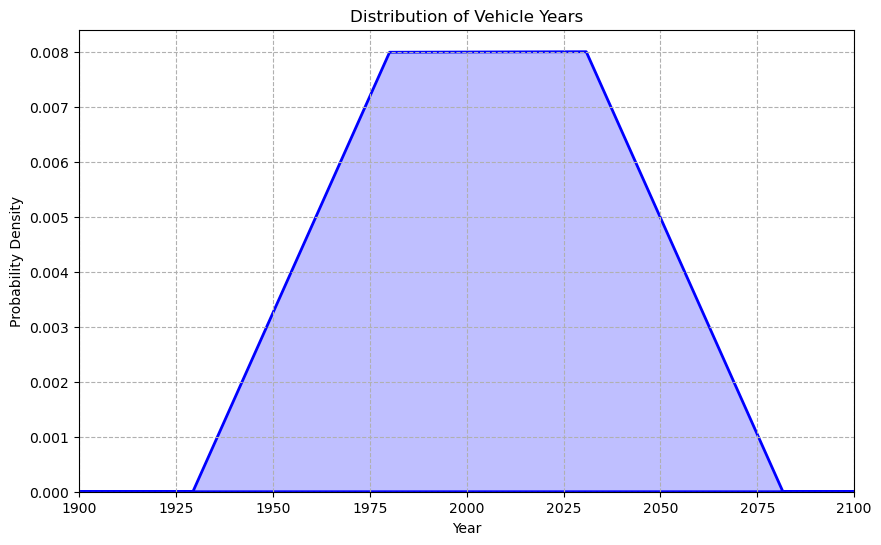

In [22]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Year'].dropna(), fill=True, color='blue', linewidth=2, bw_adjust=3.0)
plt.title('Distribution of Vehicle Years')
plt.xlabel('Year')
plt.ylabel('Probability Density')
plt.grid(True, linestyle='--')
plt.xlim(1900, 2100)

plt.savefig('years.png')
plt.show()

This graph represents the distribution of vehicle years that received violations with estimated probability density. The year range is restricted to exclude some outliers (e.g. a car from the year 500).

Prepare the second graph:

<function matplotlib.pyplot.show(close=None, block=None)>

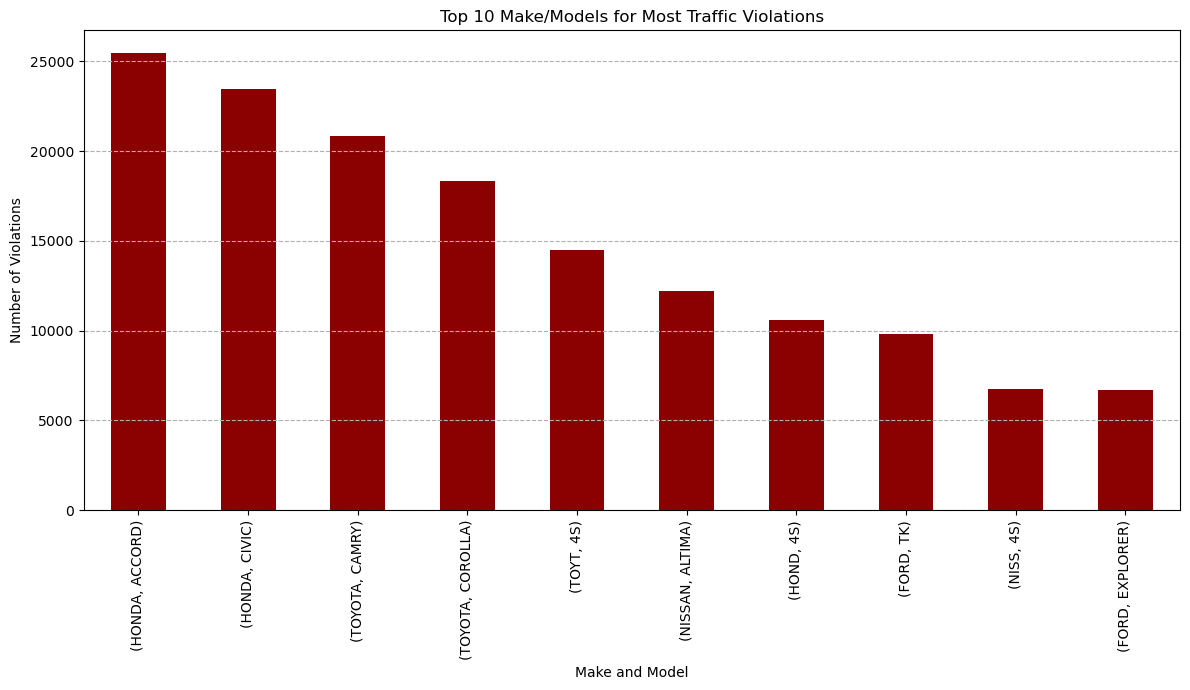

In [23]:
make_model_count = df.groupby(['Make', 'Model']).size().nlargest(10)

plt.figure(figsize=(12, 7))
make_model_count.plot(kind='bar', color='darkred')
plt.title('Top 10 Make/Models for Most Traffic Violations')
plt.xlabel('Make and Model')
plt.ylabel('Number of Violations')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()

plt.savefig('make_models.png')
plt.show

This graph shows the top 10 make and models for traffic violations.

Prepare the thrid graph:

In [24]:
top_colors = df['Color'].dropna().value_counts().nlargest(5)

top_colors

Color
BLACK     159407
SILVER    146733
WHITE     120076
GRAY       86045
RED        63752
Name: count, dtype: int64

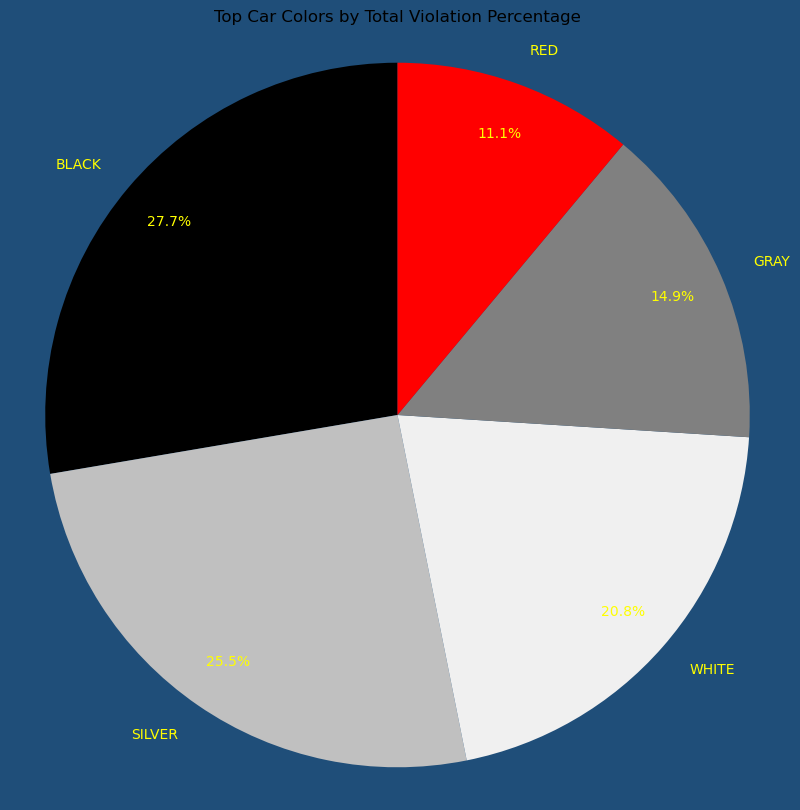

In [25]:
color_map = {
    'BLACK': '#000000',
    'SILVER': '#C0C0C0',
    'WHITE': '#F0F0F0',
    'GRAY': '#808080',
    'RED': '#FF0000'
}

plot_colors = [color_map[color] for color in top_colors.index]

plt.figure(figsize=(10,10))
fig = plt.gcf()

fig.patch.set_facecolor('#1f4e79')

plt.pie(
    top_colors,
    labels=top_colors.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plot_colors,
    pctdistance=0.85,
    textprops={'color': 'yellow'}
)

plt.title('Top Car Colors by Total Violation Percentage')
plt.axis('equal')

plt.savefig('colors')
plt.show()

This graph demonstrates the top five vehicle colors by percentage of total violations. Many years ago, it was common for news articles to claim that red cars were more ticketed than any other car color. This statement is false at face value, but if we ignore that black, silver, white, and gray are all neutral and very common colors and consider that red is the only non-neutral color in the top five, the statement is partially true but misleading.

Prepare the fourth graph:

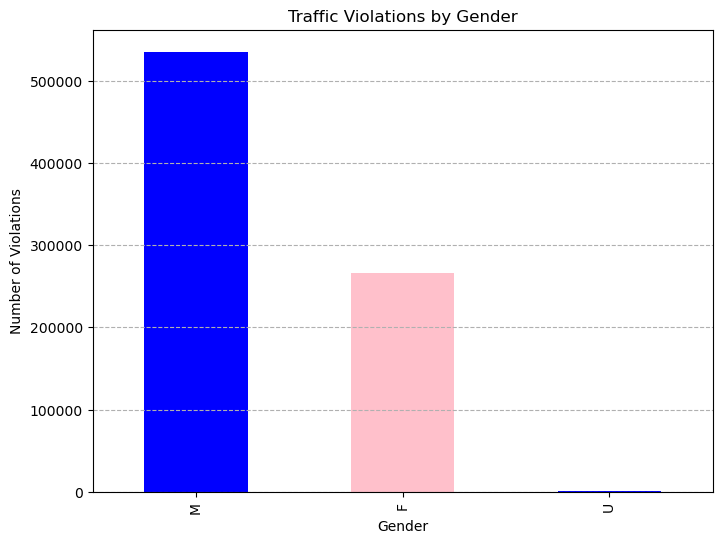

In [26]:
gender_counts = df['Gender'].dropna().value_counts()

plt.figure(figsize=(8, 6))

colors = ['blue', 'pink']

gender_counts.plot(kind='bar', color=colors)

plt.title('Traffic Violations by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Violations')

plt.grid(axis='y', linestyle='--')

plt.savefig('genders.png')
plt.show()

This graph shows the violation count by gender. Auto insurance rates are typically higher for males than females due to males supposedly being more reckless and likely to break traffic laws.

Prepare the fifth graph:

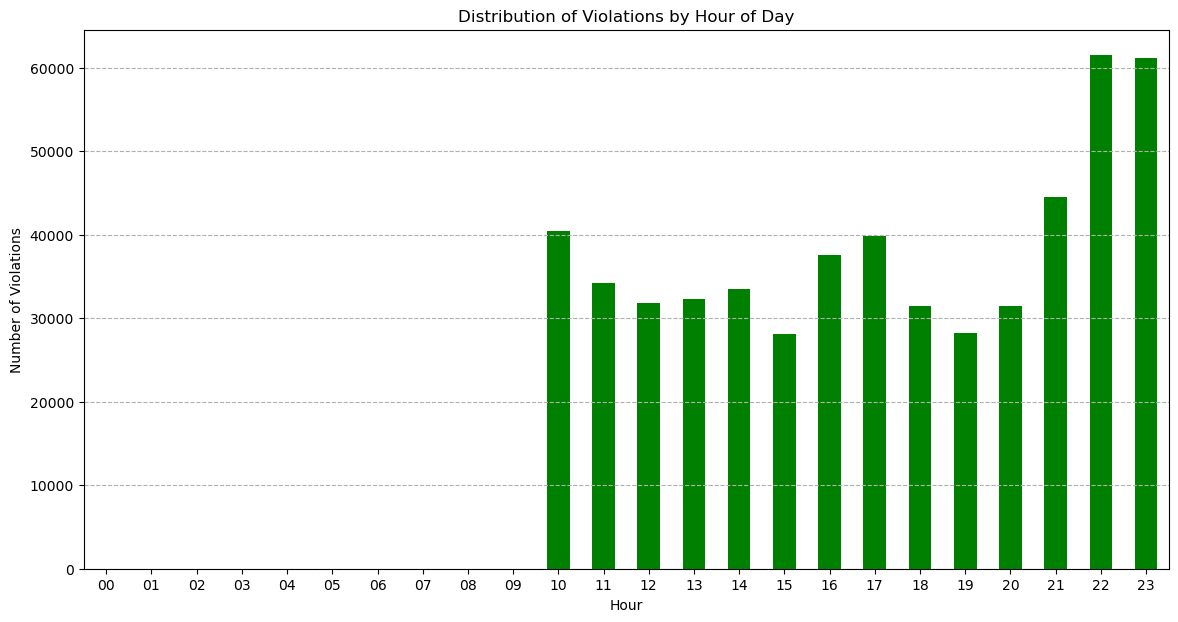

In [27]:
times = df['Time Of Stop'].dropna().astype(str)

valid_times = times[times.str.match(r'^[\d:]{8}$')]

hourly_counts = valid_times.str.slice(0, 2).value_counts().sort_index()

hour_index = [str(i).zfill(2) for i in range(24)]

hourly_counts = hourly_counts.reindex(hour_index, fill_value=0)

plt.figure(figsize=(14,7))

hourly_counts.plot(kind='bar', color='green')

plt.title('Distribution of Violations by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Violations')

plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')

plt.savefig('hours.png')
plt.show()

This graph shows the distribution of the "Time of Stop" by number of violations, showing which hours of the day are the most patrolled by law enforcement or which hours are most likely for drivers to violate traffic law.